<a href="https://colab.research.google.com/github/MaratGin/ICV-projects/blob/main/classwork/Image_Representation_and_Basic_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2. Image Representation and Basic Image Processing


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import random

from typing import Tuple

## 1. Binary Images

In [ ]:
def show_pixel_coords(height: int, width: int, grid: bool = True) -> None:
  """
  Displays pixel coordinates on a grid with optional grid lines.

  Parameters:
    height (int): Number of pixels along the Y-axis (image height).
    width (int): Number of pixels along the X-axis (image width).
    grid (bool): Whether to display grid lines (default is True).

  Returns:
    None
  """
  # Set major ticks for the grid (slightly offset for visual alignment)
  plt.xticks(np.arange(0, width, 1) - 0.5)
  plt.yticks(np.arange(0, height, 1) - 0.5)

  # Set minor ticks at exact pixel positions
  plt.gca().set_xticks(np.arange(0, width, 1), minor=True)
  plt.gca().set_yticks(np.arange(0, height, 1), minor=True)

  # Display pixel coordinates as minor tick labels
  plt.gca().set_xticklabels(np.arange(0, width), minor=True)
  plt.gca().set_yticklabels(np.arange(0, height), minor=True)

  # Customize the appearance of the minor ticks
  plt.gca().tick_params(axis='both', which='minor', length=0, labelsize=10)

  # Hide major tick labels and bars (we only need minor ticks with labels)
  plt.gca().tick_params(axis='both', which='major', length=0)
  plt.gca().set_xticklabels([])
  plt.gca().set_yticklabels([])

  # Enable the grid for major ticks if requested
  plt.grid(grid, which='major')

In [ ]:
def show_pixel_values(image: np.ndarray, vmin: int = 0, vmax: int = 1) -> None:
  """
  Display pixel intensity values on top of an image
  with color-coded text based on intensity.

  Parameters:
    image (np.ndarray): The image (2D array) to display the pixel values for.
    vmin (int): Minimum intensity value for the image (default is 0).
    vmax (int): Maximum intensity value for the image (default is 1).

  Returns:
    None
  """
  # Calculate a threshold to determine the text color (white or black)
  v_thresh = vmin + ((vmax - vmin) // 2)

  # Loop over each pixel in the image and display the intensity value
  for row_id in range(image.shape[0]):
    for col_id in range(image.shape[1]):
       # Determine the text color based on the pixel intensity
      color = 'k' if image[row_id, col_id] > v_thresh else 'w'

      # Display the intensity value as text centered in the pixel
      plt.text(col_id, row_id, f'{image[row_id, col_id]}',
              horizontalalignment='center', color=color, style='normal')

Let's generate a binary image as a 2D grid of pixels (0s - black, 1s - white):

In [ ]:
# Set the resolution of the image (number of pixels along the X and Y axis)
resolution = (10, 10)

# Generate a binary image initialized with 0s (black)
binary_image = np.zeros(resolution, dtype=np.uint8)

# Set the main diagonal to 1s (white)
np.fill_diagonal(binary_image, 1)

# Print the resulting binary image
print(binary_image)

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [ ]:
# Display the binary image using Matplotlib
plt.figure(figsize=(4, 4)) # Q: What are the units for figsize?

plt.imshow(binary_image, cmap='gray') # Q: What is cmap?
plt.title('Binary Image (with White Diagonal)')

# Show pixel coordinates and values for demonstration purposes
show_pixel_coords(*binary_image.shape)
show_pixel_values(binary_image)

# Show the plot
plt.show()

A binary image consists of only two pixel values:
- 0: black pixel (min intensity)
- 1: white pixel (max intensity)

This format is often used for **segmentation** tasks where you're interested in separating objects from the background (e.g., detecting shapes or regions).

In [ ]:
# Convert binary image to uint8 and scale it to the range [0, 255]
# This is necessary to save it in image formats like PNG/JPEG that expect 8-bit images
binary_image_exported = (binary_image * 255).astype(np.uint8)

# Save the binary image using OpenCV
saved = cv2.imwrite('binary_image.png', binary_image_exported)

print(f'Saved: {saved}')

Saved: True


In [ ]:
!ls -lh

total 8.0K
-rw-r--r-- 1 root root  100 Nov 20 16:53 binary_image.png
drwxr-xr-x 1 root root 4.0K Nov 18 14:23 sample_data


Load and display the exported binary image:

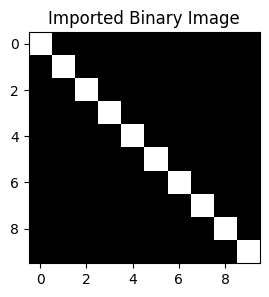

In [ ]:
# Load the binary image as a grayscale image using OpenCV
binary_image_imported = cv2.imread('binary_image.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(3, 3))

plt.imshow(binary_image_imported, cmap='gray', vmin=0, vmax=255)
plt.title('Imported Binary Image')
plt.show()

In [ ]:
# Set the resolution of the image (number of pixels along the X and Y axis)
resolution = (9, 9)

# Generate a binary image with 1s along the main diagonal
binary_image_diag = np.eye(*resolution, dtype=np.uint8)

# Generate the anti-diagonal binary image (1s along the anti-diagonal)
binary_image_anti_diag = np.fliplr(binary_image_diag)

# Binary OR operation: 1 where either diagonal or anti-diagonal has 1
binary_image_OR = cv2.bitwise_or(binary_image_diag, binary_image_anti_diag)

# Binary AND operation: 1 where both diagonal and anti-diagonal have 1
binary_image_AND = cv2.bitwise_and(binary_image_diag, binary_image_anti_diag)

# Unary NOT operation: Inverts the diagonal, making 1s into 0s and 0s into 1s
binary_image_NOT = cv2.bitwise_not(binary_image_diag)

# Binary XOR operation: 1 where diagonal and anti-diagonal differ (1 in only one of them)
binary_image_XOR = cv2.bitwise_xor(binary_image_diag, binary_image_anti_diag)

In [ ]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 3, 1)
plt.imshow(binary_image_diag, cmap='gray')
plt.title('Binary Image A (Diagonal)')

plt.subplot(2, 3, 4)
plt.imshow(binary_image_anti_diag, cmap='gray')
plt.title('Binary Image B (Anti-Diagonal)')

plt.subplot(2, 3, 5)
plt.imshow(binary_image_OR, cmap='gray')
plt.title('Binary Image (A OR B)')

plt.subplot(2, 3, 3)
plt.imshow(binary_image_AND, cmap='gray')
plt.title('Binary Image (A AND B)')

plt.subplot(2, 3, 2)
plt.imshow(binary_image_NOT, cmap='gray')
plt.title('Binary Image (NOT A)')

plt.subplot(2, 3, 6)
plt.imshow(binary_image_XOR, cmap='gray')
plt.title('Binary Image (A XOR B)')

plt.tight_layout() # Q: What does it do?

plt.show()

## 2. Grayscale Images

In [ ]:
# Grayscale image data (1D array)
gray_image_data = [
    157, 153, 174, 168, 150, 152, 129, 151, 172, 161, 155, 156,
    155, 182, 163, 74, 75, 62, 33, 17, 110, 210, 180, 154,
    180, 180, 50, 14, 34, 6, 10, 33, 48, 106, 159, 181,
    206, 109, 5, 124, 131, 111, 120, 204, 166, 15, 56, 180,
    194, 68, 137, 251, 237, 239, 239, 228, 227, 87, 71, 201,
    172, 105, 207, 233, 233, 214, 220 ,239, 228, 98, 74, 206,
    188, 88, 179, 209, 185, 215, 211, 158, 139, 75, 20, 169,
    189, 97, 155, 84, 10, 168, 134, 11, 31, 62, 22, 148,
    199, 168, 191, 193, 158, 227, 178, 143, 182, 106, 36, 190,
    205, 174, 155, 252, 236, 131, 149, 178, 228, 43, 95, 234,
    190, 216, 116, 149, 236, 187, 86, 150, 79, 38, 218, 241,
    190, 224, 157, 108, 227, 210, 127, 102, 36, 101, 255, 224,
    190, 214, 173, 66, 103, 144, 96, 50, 2, 109, 249, 215,
    187, 196, 235, 75, 1, 81, 47, 0, 6, 217, 255, 211,
    183, 202, 237, 145, 0, 0, 12, 108, 200, 138, 243, 236,
    195, 206, 123, 207, 177, 121, 123, 200, 175, 13, 96, 218
]

print(f'Number of pixels: {len(gray_image_data)}')

Number of pixels: 192


In [ ]:
# Reshape the 1D array into a 16x12 2D array (16 x 12 = 192)
gray_image = np.reshape(gray_image_data, (16, 12)).astype(np.uint8)
print(f'Image shape: {gray_image.shape}')

Image shape: (16, 12)


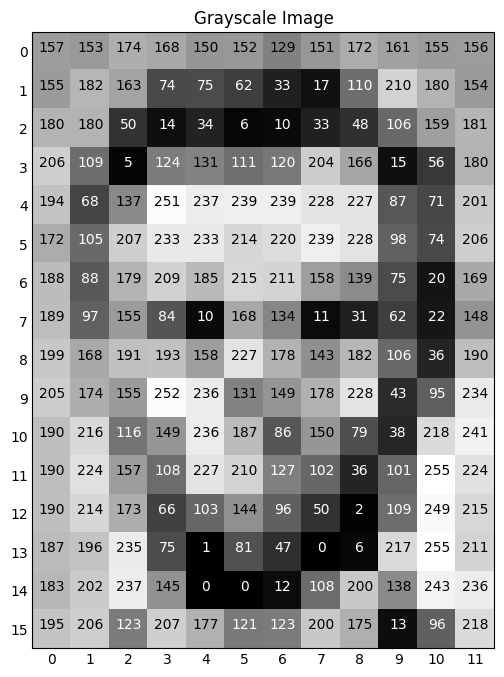

In [ ]:
# Display the image using Matplotlib

# Q: What did I do with figsize?

plt.figure(figsize=(gray_image.shape[1] // 2, gray_image.shape[0] // 2))

plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

# Display pixel coordinates and values for demonstration purposes
show_pixel_coords(*gray_image.shape, grid=False)
show_pixel_values(gray_image, vmin=0, vmax=255)

plt.show()

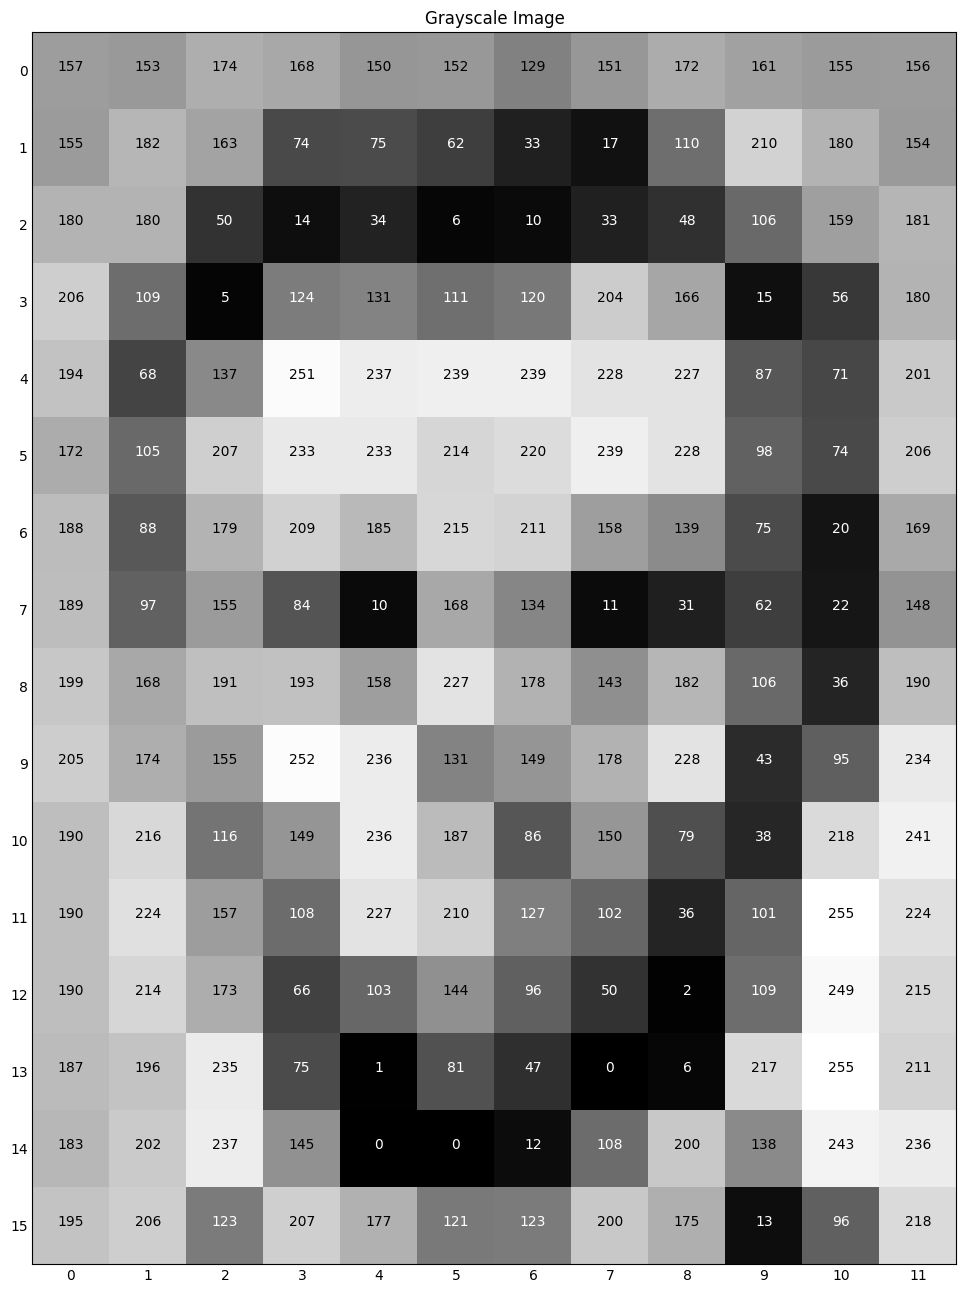

In [ ]:
# Display the image using Matplotlib

# Q: What did I do with figsize?

plt.figure(figsize=(gray_image.shape[1], gray_image.shape[0]))

plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

# Display pixel coordinates and values for demonstration purposes
show_pixel_coords(*gray_image.shape, grid=False)
show_pixel_values(gray_image, vmin=0, vmax=255)

plt.show()

A grayscale image (8-bit) contains 256 distinct intensity levels:
- 0: black pixel (absence of light)
- 1-254: shades of gray (transitioning from dark to light)
- 255: white pixel (the maximum intensity)

**Grayscale images** are widely used in **image processing** and **computer vision** because they simplify analysis by focusing solely on intensity variations, without the complexity of color. This format is ideal for tasks such as **edge detection**, **thresholding**, and **texture analysis**.

To modify the brightness of the grayscale image, we can adjust the pixel values by adding or subtracting a certain constant (`brighness_value`) across all pixels. Brightness can be increased by adding a positive value and decreased by subtracting a value from each pixel.

In [ ]:
def adjust_brightness(image: np.ndarray, brightness_value: int) -> np.ndarray:
  """
  Adjust the brightness of an image by adding or subtracting a constant value.

  Parameters:
    image (np.ndarray): The input image (grayscale or color).
    brightness_value (int): The value to adjust the brightness by. Positive values
                              increase brightness, negative values decrease it.

  Returns:
    np.ndarray: The brightness-adjusted image.
  """
  # If brightness_value is 0, no adjustment is needed
  if brightness_value == 0:
    return image

  # Create a matrix filled with the absolute brightness value (same size as image)
  brightness_mat = np.full(image.shape, np.abs(brightness_value), dtype=np.uint8)

  # If the brightness value is positive, increase brightness
  if brightness_value > 0:
    return cv2.add(image, brightness_mat)

  # If the brightness value is negative, decrease brightness
  return cv2.subtract(image, brightness_mat)

`cv2.add()` and `cv2.subtract()` ensure proper handling of **overflow** (pixel values going over 255) and **underflow** (pixel values going under 0).

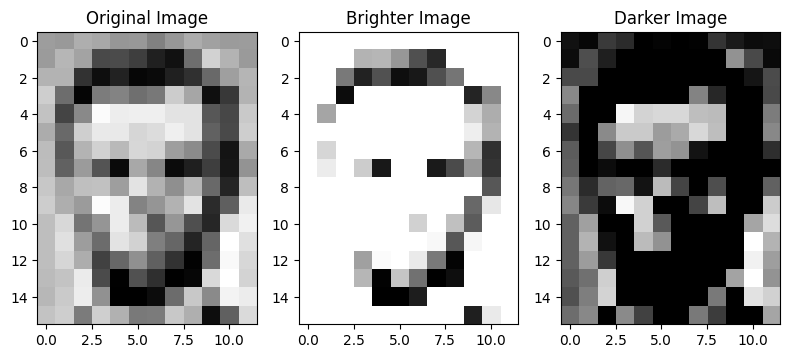

In [ ]:
# Set the brightness value
# A: Try different brightness values and see what happens
brighness_value = 150

# Increase brightness
brighter_image = adjust_brightness(gray_image, brighness_value)

# Decrease brightness
darker_image = adjust_brightness(gray_image, -brighness_value)

# Display the original, brightened, and darkened images side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(brighter_image, cmap='gray')
plt.title('Brighter Image')

plt.subplot(1, 3, 3)
plt.imshow(darker_image, cmap='gray')
plt.title('Darker Image')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Save the grayscale image using OpenCV
saved = cv2.imwrite('grayscale_image.png', gray_image)

print(f'Saved: {saved}')

Saved: True


In [ ]:
!ls -lh

total 12K
-rw-r--r-- 1 root root  100 Nov 20 16:53 binary_image.png
-rw-r--r-- 1 root root  276 Nov 20 16:59 grayscale_image.png
drwxr-xr-x 1 root root 4.0K Nov 18 14:23 sample_data


Load and display the exported grayscale image:

In [ ]:
# Load the grayscale image using OpenCV
gray_image_imported = cv2.imread('grayscale_image.png', cv2.IMREAD_GRAYSCALE)

# Display the image using Matplotlib
# No need to create a figure explicitly

plt.imshow(gray_image_imported, cmap='gray')
plt.title('Imported Grayscale Image')
plt.show()

Let's do a brighness normalization on a downloaded image:

In [ ]:
!wget --user-agent="Mozilla/5.0" https://i.imgur.com/nxteSPe.png -O image-nature.png

--2024-11-20 17:00:49--  https://i.imgur.com/nxteSPe.png
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321683 (1.3M) [image/png]
Saving to: ‘image-nature.png’

image-nature.png    100%[===================>]   1.26M  1.83MB/s    in 0.7s    

2024-11-20 17:00:50 (1.83 MB/s) - ‘image-nature.png’ saved [1321683/1321683]



In [ ]:
def normalize_brightness(image: np.ndarray, target_brightness: int) -> np.ndarray:
  """
  Normalize the brightness of an image by adjusting the pixel intensities
  so that the mean brightness matches the target brightness.

  Parameters:
    image (np.ndarray): The input grayscale image.
    target_brightness (int): The target mean brightness (0-255).

  Returns:
    np.ndarray: The brightness-normalized image.
  """

  # Calculate the mean brightness of the image
  mean_brightness = int(np.mean(image))

  print(f'Mean brightness: {mean_brightness}')
  print(f'Target brightness: {target_brightness}')

  # Calculate the difference between target and mean brightness
  brightness_difference = target_brightness - mean_brightness

  # Normalize the brightness by adjusting the pixel values and clipping them to [0, 255]
  return np.clip(image + brightness_difference, 0, 255) # Q: Why do we need to clip?

In [ ]:
# Load the grayscale image using OpenCV
gray_image = cv2.imread('image-nature.png', cv2.IMREAD_GRAYSCALE)

# Normalize the brightness to a target brightness
target_brightness = 300
gray_image_norm = normalize_brightness(gray_image, target_brightness)

# Display the original and normalized images side by side
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title(f'Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image_norm, cmap='gray')
plt.title(f'Normalized Image (Target Brightness: {target_brightness})')
plt.axis('off')

plt.tight_layout()
plt.show()

Mean brightness: 131
Target brightness: 300


## 3. RGB Images

Download a color image:

In [ ]:
# List of image URLs
# Source: https://imgur.com/a/attack-of-gophers-king-arrives-Im5AQmu
image_urls = [
  "https://i.imgur.com/AlsiPnc.jpeg",
  "https://i.imgur.com/i8BnzPd.jpeg",
  "https://i.imgur.com/ki8rQSW.jpeg",
  "https://i.imgur.com/FTVh9CV.jpeg",
  "https://i.imgur.com/MUOzaiS.jpeg",
  "https://i.imgur.com/smpPxDd.jpeg",
  "https://i.imgur.com/zphhITE.jpeg", # Q: Is it OK to put comma here?
]

# Randomly select an image URL from the list
selected_url = random.choice(image_urls)
print(f'Selected URL: {selected_url}')

# Download the selected image with wget
# Q: Why do we need to specify the user-agent in our request?
!wget --user-agent="Mozilla/5.0" {selected_url} -O image-gophers.jpeg

Selected URL: https://i.imgur.com/FTVh9CV.jpeg
--2024-11-20 17:02:30--  https://i.imgur.com/FTVh9CV.jpeg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92254 (90K) [image/jpeg]
Saving to: ‘image-gophers.jpeg’

image-gophers.jpeg  100%[===================>]  90.09K   331KB/s    in 0.3s    

2024-11-20 17:02:30 (331 KB/s) - ‘image-gophers.jpeg’ saved [92254/92254]



In [ ]:
# Load the image using OpenCV
# A: Try to change the path to the image and see what happens
image_filename = 'image-gophers.jpeg'
image = cv2.imread(image_filename)

# Check if the image was loaded successfully
if image is None:
  raise FileNotFoundError(f'Could not load image: {image_filename}')

print(f'Status: loaded')

Status: loaded


Let's inspect properties of the loaded image:

In [ ]:
# Print the properties of the image
print(f'Resolution: {image.shape}')
print(f'Image type: {type(image)}')
print(f'Data type: {image.dtype}')

Resolution: (794, 954, 3)
Image type: <class 'numpy.ndarray'>
Data type: uint8


Q: How to interpret the output?

In OpenCV color images are represented in BGR color space (compared to RGB the Red and Blue channels are swapped).

Let's convert the image into RGB and Grayscale formats:

In [ ]:
# Convert from BGR to RGB format for display with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert from BGR to GRAY format
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

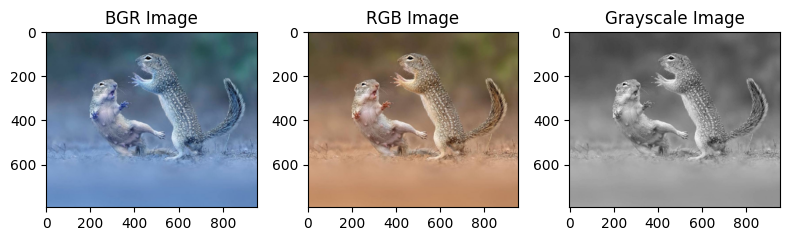

In [ ]:
# Display the images using Matplotlib
plt.figure(figsize=(8, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('BGR Image')

plt.subplot(1, 3, 2)
plt.imshow(image_rgb)
plt.title('RGB Image')

plt.subplot(1, 3, 3)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

RGB images have three separate channels for Red, Green, and Blue colors. We can operate on each of them individually by using array slices:

In [ ]:
# Create a black background (BGR image with zeros)
shape = (400, 400, 3)
image_bgr = np.zeros(shape, dtype=np.uint8)

# Draw a blue circle
cv2.circle(image_bgr, (100, 100), 50, (255, 0, 0), -1)

# Draw a green ellipse
cv2.ellipse(image_bgr, (300, 100), (60, 40), 0, 0, 360, (0, 255, 0), -1)

# Draw a red rectangle
cv2.rectangle(image_bgr, (200, 250), (350, 350), (0, 0, 255), -1)

# Draw a yellow circle
cv2.circle(image_bgr, (200, 200), 32, (50, 255, 255), -1)

# Convert the BGR image to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(image_rgb)
plt.title('Blue Circle, Green Ellipse, and Red Rectangle')
plt.show()

In [ ]:
# Create a new RGB image where only the red channel is active
red_image_rgb = np.zeros_like(image_rgb)
green_image_rgb = np.zeros_like(image_rgb)
blue_image_rgb = np.zeros_like(image_rgb)

red_image_rgb[:, :, 0] = image_rgb[:, :, 0]
green_image_rgb[:, :, 1] = image_rgb[:, :, 1]
blue_image_rgb[:, :, 2] = image_rgb[:, :, 2]
# A: Display the Blue and Green color channels

# Display the image using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(red_image_rgb)
plt.title('Red Channel of the Image')

plt.subplot(1, 3, 2)
plt.imshow(blue_image_rgb)
plt.title('Blue Channel of the Image')

plt.subplot(1, 3, 3)
plt.imshow(green_image_rgb)
plt.title('Green Channel of the Image')

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

Q: What is the reason we are seeing a yellow circle?

## 4. Histograms

In [ ]:
!wget --user-agent="Mozilla/5.0" https://i.imgur.com/YyzwElU.jpeg -O image-hist.jpeg

--2024-11-20 17:12:29--  https://i.imgur.com/YyzwElU.jpeg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16426 (16K) [image/jpeg]
Saving to: ‘image-hist.jpeg’

image-hist.jpeg     100%[===================>]  16.04K  --.-KB/s    in 0.02s   

2024-11-20 17:12:29 (984 KB/s) - ‘image-hist.jpeg’ saved [16426/16426]



In [ ]:
def plot_hist(hist: np.ndarray, bins: np.ndarray,
              fc: str = 'black', bar_width: int = 1,
              ticks_step: int = 50, vmax: int = 255) -> None:
  """
  Plot a histogram of pixel intensities.

  Parameters:
    hist (np.ndarray): Array of histogram frequencies.
    bins (np.ndarray): Array of bin edges.
    fc: (str): Foreground color of the bars.
    bar_width (int): Width of the bars.
    ticks_step (int): Step size for ticks on the X-axis. Default is 50.
    vmax (int): Maximum value for pixel intensity (default is 255 for 8-bit images).

  Returns:
    None
  """
  # Plot bars for each bin representing the frequency of pixel intensities
  plt.bar(bins[:-1], hist, width=bar_width, fc=fc, alpha=0.75)

  # Adjust the ticks on the X-axis based on the provided step
  plt.xticks(np.arange(0, vmax, ticks_step))

  plt.grid()

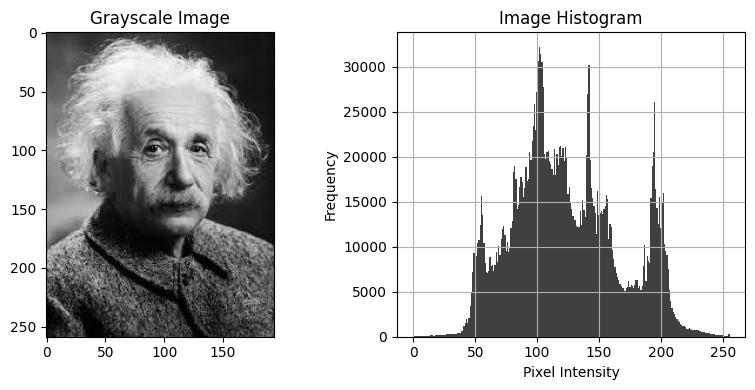

In [ ]:
# Load the image in grayscale
image_gray = cv2.imread('image-hist.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram (flatten the image to 1D)
image_hist, image_bins = np.histogram(image.flatten(), bins=256, range=(0, 256))

# Display the histogram alongside the image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plot_hist(image_hist, image_bins)

plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print('Image contranst: {}'.format(np.max(image_gray) - np.min(image_gray)))

Image contranst: 249


**Image Histogram Analysis**

When analyzing the histogram of an image, consider the following key questions:

**1. What is the overall distribution of pixel intensities?**
- Are most of the pixels concentrated in the darker range (near 0), the brighter range (near 255), or evenly distributed across the entire intensity range?
- This helps determine whether the image is predominantly dark, bright, or balanced.

**2. Where do the frequency peaks occur in the histogram?**
- Are there specific intensity values where the pixel frequency is highest?
- Do these peaks correspond to particular features in the image (e.g., background, objects)?

**3. How evenly are the pixel intensities distributed?**
- Are the pixel intensities spread uniformly across the histogram, or are they clustered in certain ranges?
- If the intensities are clustered, does the image exhibit low contrast as a result?

**Notes**:
- A well-distributed histogram often indicates a high-contrast image with clear details.
- Clustering at either extreme (dark or light) may suggest underexposure or overexposure.


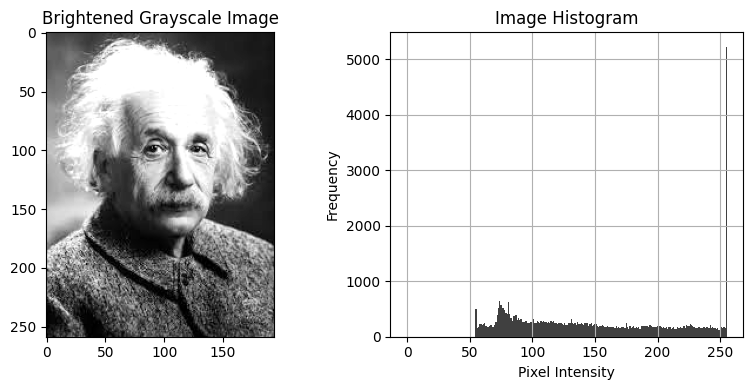

In [ ]:
# Increase brightness
brighter_image = adjust_brightness(image_gray, 55)

# Calculate the histogram for the brightened image
image_hist, image_bins = np.histogram(brighter_image.flatten(),
                                      bins=256, range=(0, 256))

# Display the brightened image and its histogram
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(brighter_image, cmap='gray')
plt.title('Brightened Grayscale Image')

plt.subplot(1, 2, 2)
plot_hist(image_hist, image_bins)

plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print('Image contranst (brighter): {}'.format(np.max(brighter_image) - np.min(brighter_image)))

Image contranst (brighter): 200


In [ ]:
# Descrease brightness
darker_image = adjust_brightness(image_gray, -25)

# Calculate the histogram for the darkened image
image_hist, image_bins = np.histogram(darker_image.flatten(),
                                      bins=256, range=(0, 256))

# Display the brightened image and its histogram
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(darker_image, cmap='gray')
plt.title('Darkened Grayscale Image')

plt.subplot(1, 2, 2)
plot_hist(image_hist, image_bins)

plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print('Image contranst (darker): {}'.format(np.max(darker_image) - np.min(darker_image)))

Image contranst (darker): 224


Let's compute the **Cumulative Distribution Function (CDF)** for the histogram of our original grayscale image. The CDF allows you to understand how pixel values accumulate across the intensity range, providing useful information for tasks like contrast enhancement, histogram equalization, and image segmentation.

In [ ]:
def compute_cdf(image_gray: np.ndarray,
                nbins: int = 256) -> Tuple[np.ndarray, np.ndarray]:
  """
  Compute the Cumulative Distribution Function (CDF) of a grayscale image.

  Parameters:
    image_gray (np.ndarray): Grayscale image.
    nbins (int): The number of bins in the histogram (default is 256 for 8-bit images).

  Returns:
    cdf (np.ndarray): The cumulative distribution function (CDF).
    cdf_normalized (np.ndarray): The normalized CDF for visualization.
  """
  # Compute the histogram of the grayscale image
  hist, bins = np.histogram(image_gray.flatten(), bins=nbins, range=(0, nbins))

  # Normalize the histogram to get the PDF (probability distribution function)
  pdf = hist / hist.sum()

  # Compute the CDF by taking the cumulative sum of the PDF
  cdf = pdf.cumsum()

  # Normalize the CDF for visualization purposes (to scale between 0 and max(hist))
  cdf_normalized = cdf * float(hist.max()) / cdf.max()

  return cdf, cdf_normalized

In [ ]:
# Compute the histogram for the image
hist, bins = np.histogram(image_gray.flatten(), bins=256, range=(0, 256))

# Compute CDF and normalized CDF for the image
cdf, cdf_normalized = compute_cdf(image_gray)

# Display the histogram and CDF
plt.figure(figsize=(8, 5))

# Plot the CDF
plt.subplot(1, 2, 1)
plt.plot(cdf, color='k', lw=2)
plt.title('CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.grid()

# Plot the Histogram + normalized CDF
plt.subplot(1, 2, 2)
plot_hist(hist, bins)
plt.plot(cdf_normalized, color='red', lw=2)
plt.title('Histogram + Normalized CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

- **Histogram Equalization**: CDF is commonly used to perform histogram equalization, where the CDF is used to map pixel values to enhance contrast.
- **Image Analysis**: The CDF helps in analyzing the overall distribution and contrast of the image.

**CDF Analysis**:
1. **Flat Sections**: flat or plateau sections in the CDF indicate ranges of pixel intensities that are underrepresented (low contrast).
2. **Steep Sections**: steep sections in the CDF indicate intensity ranges that are well-represented in the image (e.g., a large portion of the image has those intensities).
3. **Even CDF**: If the CDF increases smoothly and evenly, the image likely has well-distributed pixel intensities, indicating good contrast.

By observing the CDF, you can determine if the pixel intensities are bunched up in specific regions (e.g., very dark or very bright). If so, the image might lack contrast, and a **contrast enhancement** method (like histogram equalization) could help.

**Histogram Equalization** redistributes pixel intensity values to enhance the overall contrast of the image. It achieves this by "stretching" the histogram to cover a wider range of intensities:

In [ ]:
# Apply Histogram Equalization to the darker image
image_equalized = cv2.equalizeHist(darker_image)

# Compute CDFs for the original and equalized images (for visualization purposes)
cdf, cdf_normalized = compute_cdf(darker_image)
cdf_equalized, cdf_equalized_normalized = compute_cdf(image_equalized)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(darker_image, cmap='gray')
plt.title('Original Image (Darker)')

plt.subplot(2, 2, 2)
plt.imshow(image_equalized, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 3)
plt.plot(cdf_normalized, color='k', lw=2)
plt.title('Original CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(cdf_equalized_normalized, color='k', lw=2)
plt.title('Equalized CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
print('Image contranst: {}'.format(np.max(image_equalized) - np.min(image_equalized)))

Image contranst: 255


For color images, equalizing the **luminance channel** (in YCrCb or LAB color space) prevents color distortion while improving contrast.

**CLAHE (Contrast Adaptive Histogram Equalization)** is an advanced version of histogram equalization, which operates on small regions of the image (called tiles) rather than the entire image. It enhances contrast while limiting the amplification of noise, especially in homogeneous regions (regions with similar intensity values). The method "clips" the histogram at a user-specified threshold to limit contrast enhancement in highly uniform areas.

In [ ]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16, 16))
image_clahe = clahe.apply(darker_image)

# Compute CDFs for the original and CLAHE-applied images (for visualization purposes)
cdf, cdf_normalized = compute_cdf(darker_image)
cdf_clahe, cdf_clahe_normalized = compute_cdf(image_clahe)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(darker_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(image_clahe, cmap='gray')
plt.title('Equalized Image (CLAHE)')

plt.subplot(2, 2, 3)
plt.plot(cdf, color='k', lw=2)
plt.title('Original CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(cdf_clahe, color='k', lw=2)
plt.title('Equalized CDF (CLAHE)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
print('Image contranst: {}'.format(np.max(image_clahe) - np.min(image_clahe)))

Image contranst: 253


**Advantages of CLAHE**:
1. **Prevents over-enhancement**: CLAHE avoids over-amplification of noise in homogeneous areas by applying local histogram equalization.
2. **Enhances contrast locally**: instead of global equalization, CLAHE works on smaller regions, which gives better contrast in images with varying lighting conditions.

Tile Size:
- **Smaller tile size** results in better local contrast enhancement, but can amplify noise.
- **Larger tile size** gives more global contrast enhancement.

Clip Limit:
- **Higher clip limit** means more contrast enhancement (may amplify noise).
- **Lower clip limit** restricts the contrast (limits noise amplification).

General tuning guide:
1. **For images with high noise**: use a lower `clipLimit` (e.g., 1.0 or 0.5) to prevent noise amplification.
2. **For images with low local contrast**: use a smaller `tileGridSize` (e.g., (8, 8) or smaller) to enhance local contrast.
3. **For images where global contrast needs to be improved**: use a larger `tileGridSize` (e.g., (16, 16) or larger) for more global equalization.

**Histogram Matching**: TBD

## 5. Masking and Thresholding

Let's download and prepare a color image for the demonstration of masking and tresholding in OpenCV:

In [ ]:
# Download the image of a stop sign
!wget --user-agent="Mozilla/5.0" https://i.imgur.com/ZM2xE1A.jpeg -O image-stop-sign.jpeg

--2024-11-20 17:15:57--  https://i.imgur.com/ZM2xE1A.jpeg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948398 (926K) [image/jpeg]
Saving to: ‘image-stop-sign.jpeg’

image-stop-sign.jpe 100%[===================>] 926.17K  1.40MB/s    in 0.6s    

2024-11-20 17:15:58 (1.40 MB/s) - ‘image-stop-sign.jpeg’ saved [948398/948398]



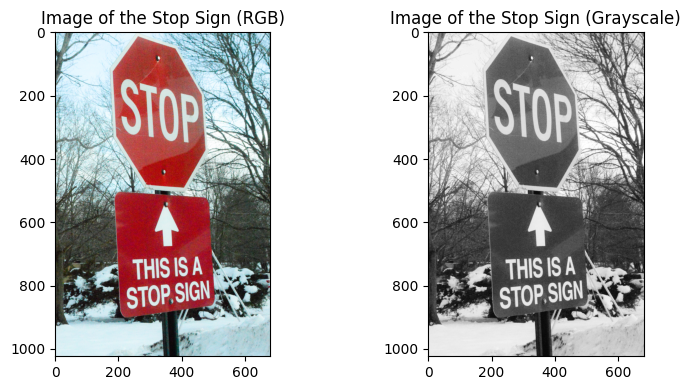

In [ ]:
# Load the image in BGR format using OpenCV
image_bgr = cv2.imread('image-stop-sign.jpeg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Display the color (RGB) and grayscale images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image of the Stop Sign (RGB)')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Image of the Stop Sign (Grayscale)')

plt.tight_layout()
plt.show()

### Masking

**Masking** in image processing refers to the process of applying a **binary mask** to an image to selectively hide or reveal certain parts of the image. A **mask** is typically a grayscale or binary image where:
- White (255) or non-zero values indicate the regions of the image that should be retained (revealed).
- Black (0) values indicate the regions of the image that should be ignored (masked out, typically set to black).

Masking is commonly used for tasks such as:
- **Object isolation**: extracting a particular object or region from an image.
- **Image blending**: selectively combining parts of two images.
- **Segmentation**: dividing an image into different regions for further analysis or manipulation.

Let's create a simple circular mask with specific radius and coordinates on the image grid:

In [ ]:
# Get the dimensions of the image
image_height, image_width, _ = image_rgb.shape # Q: What is returned at _?

# Create and initialize the binary mask with zeros (black)
mask = np.zeros((image_height, image_width), dtype=np.uint8)

# Define the center and radius of the circle
center_x, center_y = image_width // 2, image_height // 4
radius = min(image_width, image_height) // 3

# Draw a filled white circle on the mask
# A: Try drawing other shapes: e.g., unfilled circle or rectangle
# cv2.circle(mask, (center_x, center_y), radius, color=255, thickness=-1)
cv2.rectangle(mask, (0, 0), (center_x,center_y), color=(255, 0, 0), thickness=-1)
...

Ellipsis

Questions:
- What are the dimensions of the mask?
- Could we apply it directly to an RGB image? How?

(1024, 681, 3)


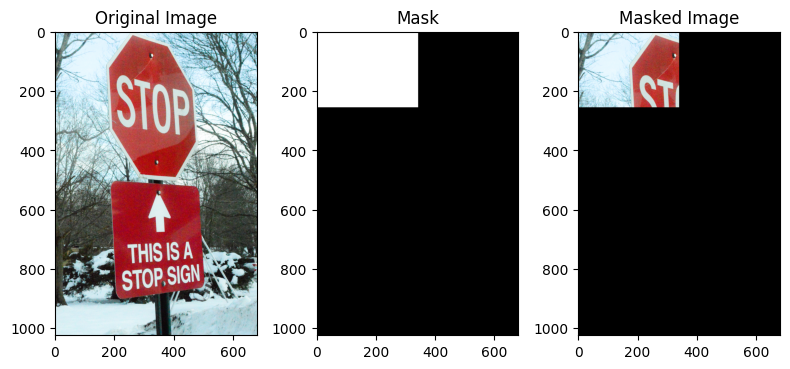

In [ ]:
# Apply the mask to the image
image_masked = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
print(image_masked.shape)

# Display the original image, the mask, and the masked image
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(image_masked)
plt.title('Masked Image')

plt.tight_layout()
plt.show()

### Binary Thresholding

**Binary thresholding** is a basic image processing technique used to convert a grayscale image into a binary image. In binary thresholding, each pixel in the grayscale image is compared to a threshold value, and based on that comparison, the pixel is assigned either the maximum value (usually white, 255) or the minimum value (usually black, 0).

This process is often used for image segmentation, where the goal is to separate objects from the background.

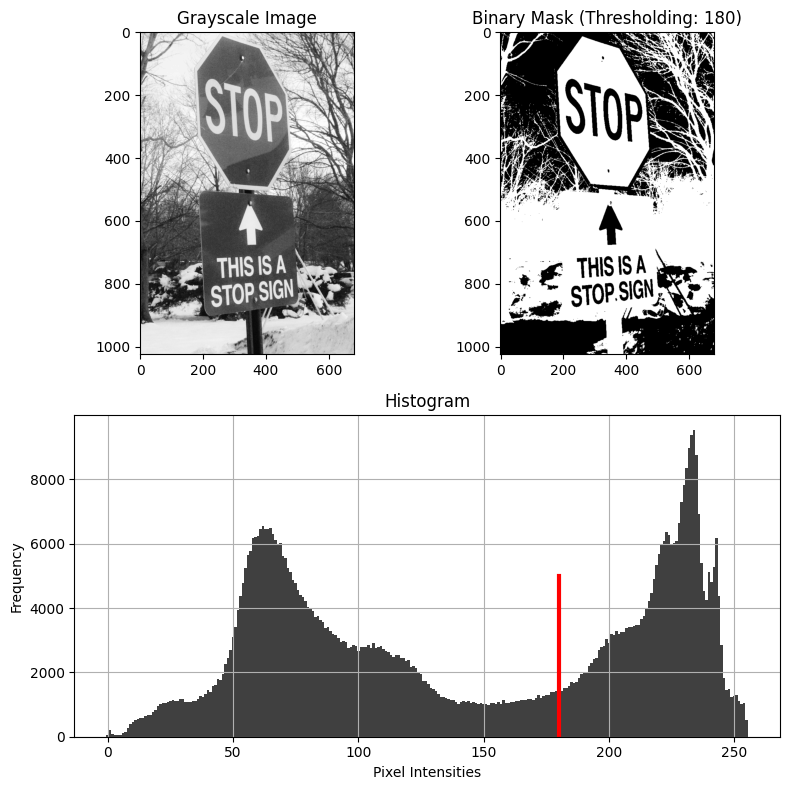

In [ ]:
# Thresholding parameters
thresh = 180 # Threshold value
vmax = 255   # Maximum pixel value to assign for binary mask (usually 255 for white)

# Apply binary thresholding to the grayscale image
_, image_thresh = cv2.threshold(image_gray, thresh, vmax, cv2.THRESH_BINARY)

# Compute the histogram for the image
hist, bins = np.histogram(image_gray.flatten(), 256, range=(0, 256))

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(2, 2, 2)
plt.imshow(image_thresh, cmap='binary')
plt.title(f'Binary Mask (Thresholding: {thresh})')

plt.subplot(2, 1, 2)
plot_hist(hist, bins)
plt.axvline(thresh, 0, 0.5, lw=3, color='red')
plt.title('Histogram')
plt.xlabel('Pixel Intensities')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Use cases for binary thresholding include:
- **Object Detection**: It helps in separating the objects from the background by converting the image to a binary format.
- **Image Segmentation**: Binary thresholding is a common step in image segmentation tasks, where different regions of the image need to be distinguished.
- **Optical Character Recognition (OCR)**: Binary images are often used in OCR applications to isolate text from the background.
- **Edge Detection and Shape Analysis**: Binary thresholding can be used as a preprocessing step in edge detection or analyzing shapes in images.

### HSV Thresholding

**HSV thresholding** is a technique in image processing used to isolate specific colors from an image based on the Hue, Saturation, and Value (HSV) color space.

Unlike the RGB color space, which directly represents the intensity of red, green, and blue components, HSV separates image information into hue (color type), saturation (color intensity), and value (brightness). This makes it much easier to isolate and manipulate specific colors in an image, especially for tasks like **color-based segmentation**, **object detection**, and **background removal**.

HSV color space:
- **Hue (H)**: Represents the type of color (e.g., red, green, blue) and is an angle between 0 and 180 degrees in OpenCV.
- **Saturation (S)**: Represents the intensity or purity of the color, ranging from 0 (gray) to 255 (fully saturated).
- **Value (V)**: Represents the brightness or intensity of the color, ranging from 0 (black) to 255 (brightest).

Let's start by converting the image into HSV color space:

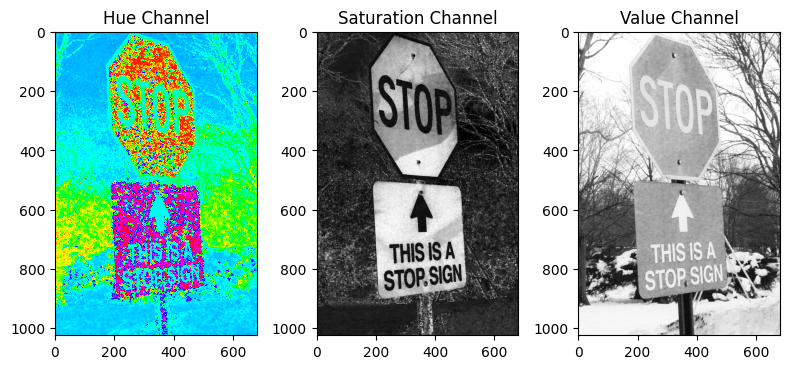

In [ ]:
# Convert the RGB image to HSV color space
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Extract the Hue, Saturation, and Value channels
hue_channel = image_hsv[:, :, 0]
saturation_channel = image_hsv[:, :, 1]
value_channel = image_hsv[:, :, 2]

# Plot the three HSV channels
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
# Hue range is [0, 179] in OpenCV
plt.imshow(hue_channel, cmap='hsv', vmin=0, vmax=179)
plt.title('Hue Channel')

plt.subplot(1, 3, 2)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation Channel')

plt.subplot(1, 3, 3)
plt.imshow(value_channel, cmap='gray')
plt.title('Value Channel')

plt.tight_layout()
plt.show()

- **Red Area (Stop Sign)**:
the red color of the stop sign is visible as a red-orange area in the hue channel. This makes sense since the hue value for red falls between 0 and 30.

- **Greenish Areas**: the greenish-cyan areas in the background represent other elements that have green or blue hues, such as the sky or trees.

**HSV thresholding** involves selecting pixels from the image that fall within a **specified range** of hue, saturation, and value. These ranges define the colors that should be extracted or highlighted.

Let's define the lower and upper bounds for the red areas on the image:

In [ ]:
# HSV thresholding sliders
H_min = 0 # @param {type:"slider", min:0, max:180, step:1}
H_max = 13 # @param {type:"slider", min:0, max:180, step:1}

S_min = 99 # @param {type:"slider", min:0, max:255, step:1}
S_max = 255 # @param {type:"slider", min:0, max:255, step:1}

V_min = 129 # @param {type:"slider", min:0, max:255, step:1}
V_max = 203 # @param {type:"slider", min:0, max:255, step:1}

# Perform HSV thresholding (this will generate a binary mask)
mask = cv2.inRange(image_hsv, (H_min, S_min, V_min), (H_max, S_max, V_max))

# Create a mask and apply it to the original RGB image
image_masked = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

- `cv2.inRange()`: creates a binary mask where pixel values within the specified HSV range are white (255), and those outside the range are black (0).
- `cv2.bitwise_and()`: applies the binary mask to the original RGB image, keeping only the pixels that fall within the specified HSV range.

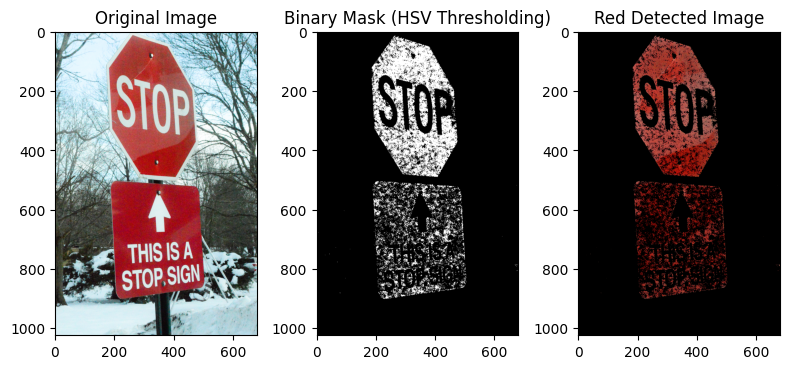

In [ ]:
# Display the thresholding results
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Binary Mask (HSV Thresholding)')

plt.subplot(1, 3, 3)
plt.imshow(image_masked)
plt.title('Red Detected Image')

plt.tight_layout()
plt.show()

Looks not that good... You can try adjusting the boundaries.

**Improvements**:

Red appears twice in the HSV spectrum because it is located at the start and end of the hue range (0° and 360°). In OpenCV, the hue values are scaled from 0 to 180, so red wraps around both the low end and the high end of the hue scale.

To detect the red color in an image, you need to check both the lower and upper hue boundaries separately.

Let's see how to do it by joining the masks:

In [ ]:
# Define the HSV range for lower red
lower_red_lower = np.array([0, 70, 50])
lower_red_upper = np.array([10, 255, 255])

# Define the HSV range for upper red
upper_red_lower = np.array([170, 70, 50])
upper_red_upper = np.array([180, 255, 255])

# Q: What are the boundaries for the red color according to the code?

# Create masks for the lower and upper red ranges
mask_lower_red = cv2.inRange(image_hsv, lower_red_lower, lower_red_upper)
mask_upper_red = cv2.inRange(image_hsv, upper_red_lower, upper_red_upper)

# Combine the two masks to get the full red range
mask = cv2.bitwise_or(mask_lower_red, mask_upper_red)

# Apply the mask to the original image
image_masked = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

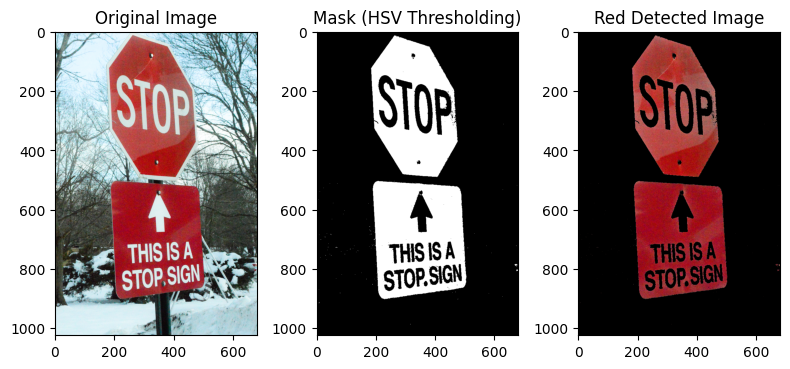

In [ ]:
# Display the original and masked images
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask (HSV Thresholding)')

plt.subplot(1, 3, 3)
plt.imshow(image_masked)
plt.title('Red Detected Image')

plt.tight_layout()
plt.show()

Looks pretty nit, right?